## Desciption

This model predicts the expression of a gene based on the Urtecho 2023 data.

In [1]:
import CNN_Urtecho_1_0 as parent

In [2]:
name = 'CNN_Urtecho_1_0'

In [3]:
import pandas as pd

file_path = '../Data/Urtecho_2023/Urtecho_2023.csv'
df = pd.read_csv(file_path)

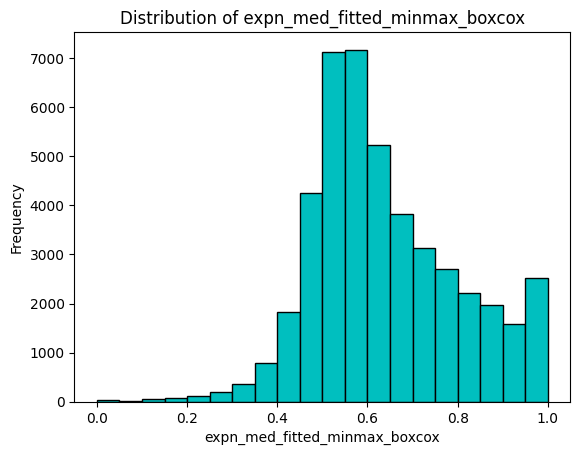

In [4]:
# graph the distribution of observed transciption rates

import matplotlib.pyplot as plt

plt.hist(df['expn_med_fitted_minmax_boxcox'], bins=20, color='c', edgecolor='black')
plt.title('Distribution of expn_med_fitted_minmax_boxcox')
plt.xlabel('expn_med_fitted_minmax_boxcox')
plt.ylabel('Frequency')
plt.show()

In [5]:
# count how many samples have log_expn_med_fitted_scaled = 0
(df['expn_med_fitted_minmax_boxcox'] == 0).sum()

35

In [6]:
X = df[['promoter_sequence']].astype(str).agg(''.join, axis=1)
y = df['expn_med_fitted_minmax_boxcox'].astype(float)
X, _ = parent.preprocess_sequences(X)

In [7]:
X_train, X_val, y_train, y_val = parent.train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = parent.train_test_split(X_val, y_val, test_size=0.5, random_state=42)

X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((36160, 150, 4), (4521, 150, 4), (4520, 150, 4), (36160,), (4521,), (4520,))

In [8]:
model = parent.build_cnn_model(X.shape[1:])
history = parent.train_model(model, X_train, y_train, X_test, y_test)
loss = parent.evaluate_model(model, X_test, y_test)
parent.save_model(model, name)

c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0325 - val_loss: 0.0256
Epoch 2/150
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0239 - val_loss: 0.0232
Epoch 3/150
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0228 - val_loss: 0.0228
Epoch 4/150
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0217 - val_loss: 0.0226
Epoch 5/150
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0206 - val_loss: 0.0219
Epoch 6/150
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0187 - val_loss: 0.0215
Epoch 7/150
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.0173 - val_loss: 0.0209
Epoch 8/150
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0158 - val_loss: 0.0260
Epoch 9/150
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0145 - val_loss: 0.0195
Epoch 10/150
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0136 - val_loss: 0.0203
Epoch 11/150
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0122 - val_loss: 0.0197
Epoch 12/150
113

1413/1413 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


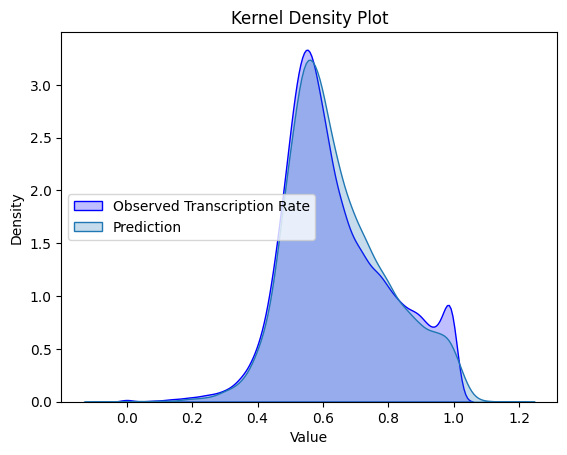

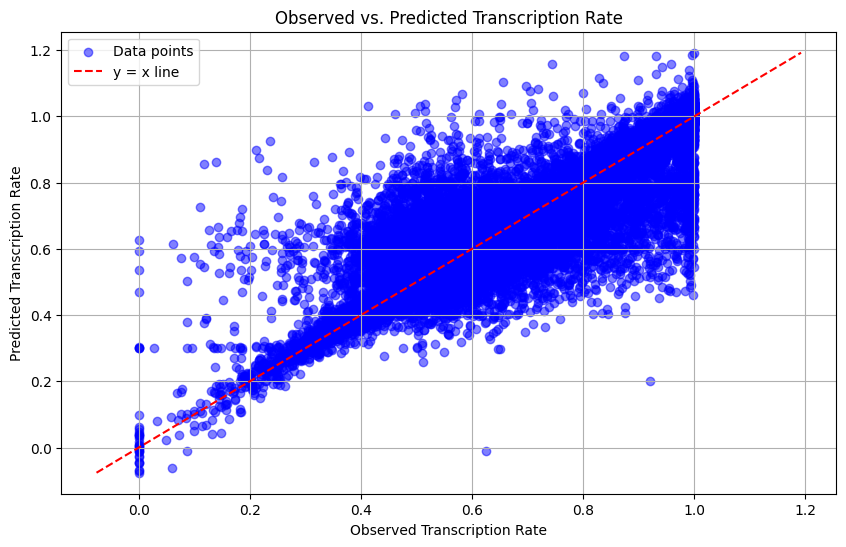

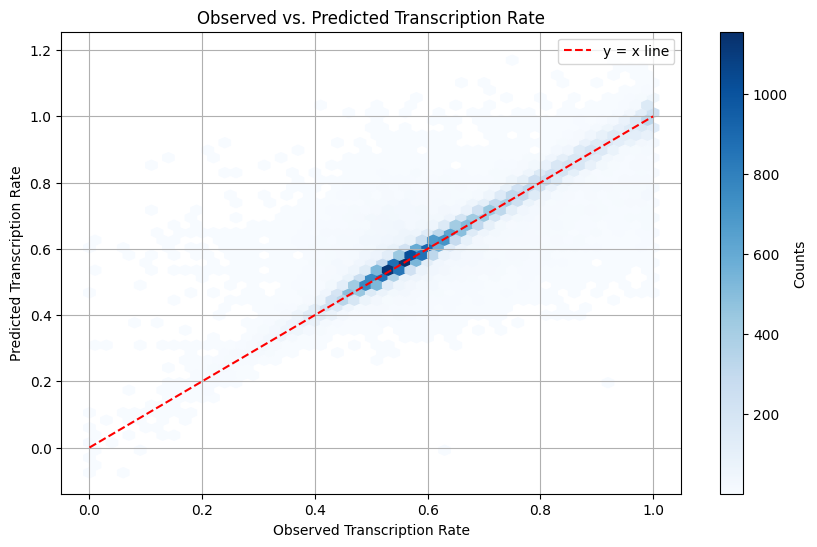

In [8]:
predicted = parent.load_and_predict(name, X)

parent.plot_kde(y, predicted)
parent.plot_scatter(y, parent.ravel(predicted))
parent.plot_hexbin(y, parent.ravel(predicted))

142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


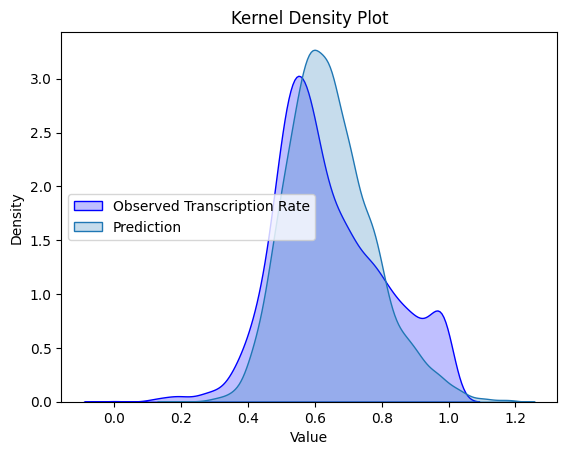

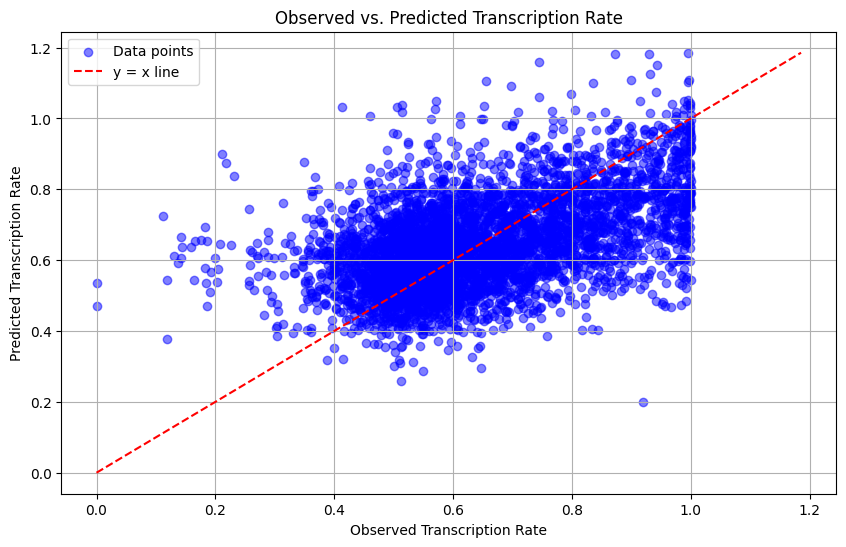

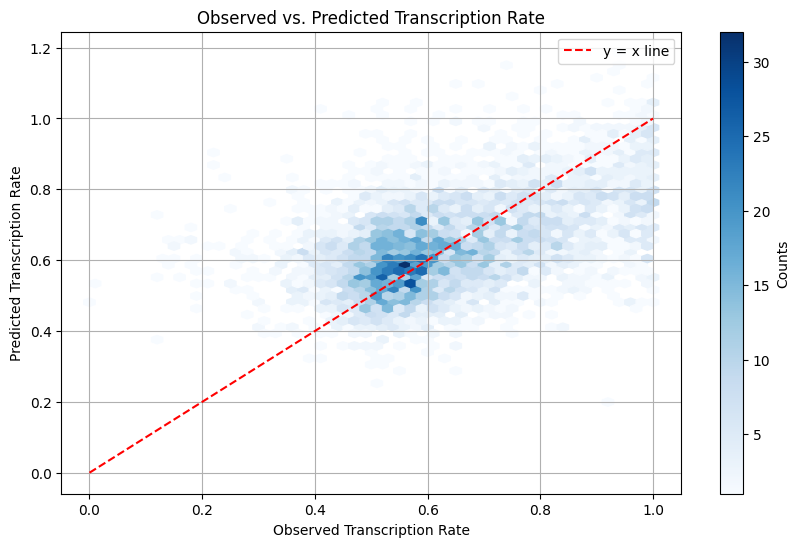

In [9]:
predicted = parent.load_and_predict(name, X_test)

parent.plot_kde(y_test, predicted)
parent.plot_scatter(y_test, parent.ravel(predicted))
parent.plot_hexbin(y_test, parent.ravel(predicted))

In [10]:
# Load, predict, and evaluate the best model
y_pred = parent.load_and_predict(name, X_test)
mse, rmse, mae, r2 = parent.calc_metrics(y_test, y_pred)

print('MSE: ', mse)
print('RMSE: ', rmse)
print('MAE: ', mae)
print('R2: ', r2)

142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
MSE:  0.02303979759250871
RMSE:  0.15178866094840124
MAE:  0.11721190543254087
R2:  0.14767747230432904
